In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype 

In [3]:
df = pd.read_csv("data/Mall_Customers.csv")

data : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop(["CustomerID"], axis=1, inplace=True)

# 1. Exploratory Analysis and Visualization
- resource: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


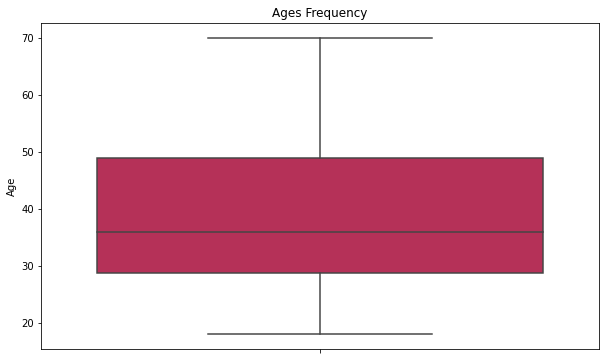

In [24]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.boxplot(y=df["Age"], palette="rocket");

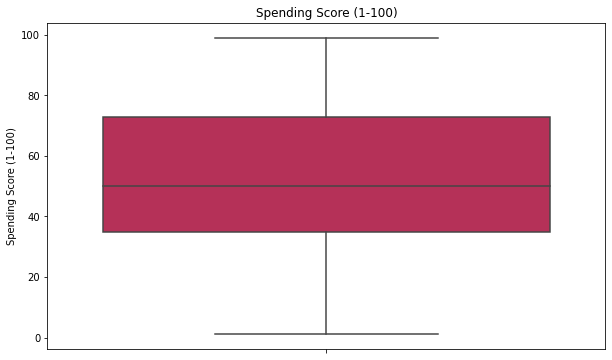

In [23]:
plt.figure(figsize=(10,6))
plt.title("Spending Score (1-100)")
sns.boxplot(y=df["Spending Score (1-100)"], palette="rocket");

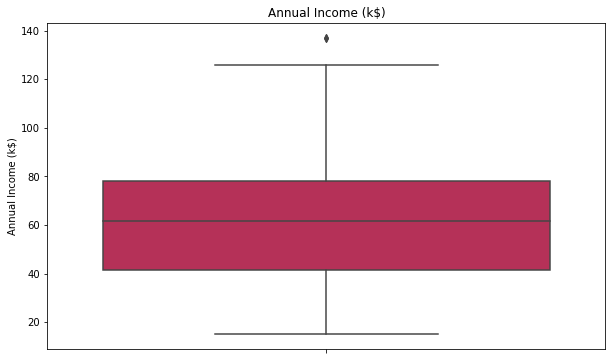

In [22]:
plt.figure(figsize=(10,6))
plt.title("Annual Income (k$)")
sns.boxplot(y=df["Annual Income (k$)"], palette="rocket");

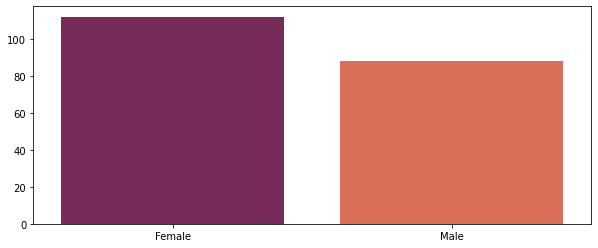

In [21]:
gender = df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index, y=gender.values, palette="rocket")
plt.show()

In [225]:
gender

Female    112
Male       88
Name: Gender, dtype: int64

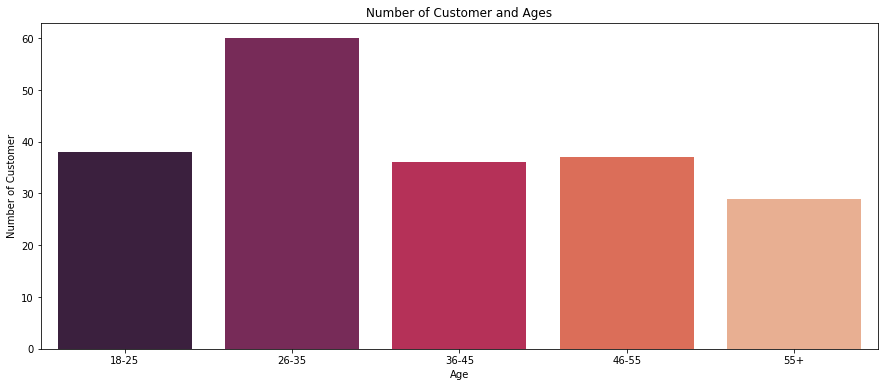

In [20]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

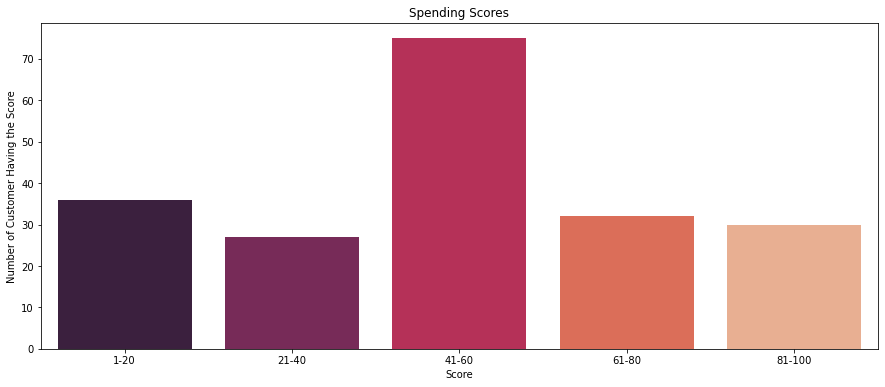

In [26]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

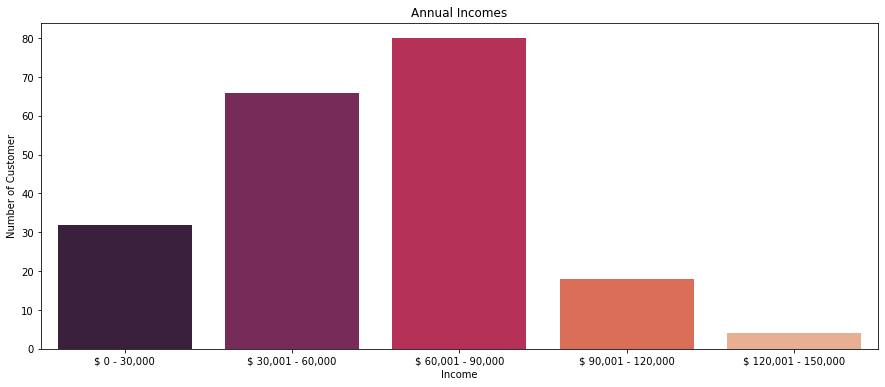

In [27]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="rocket")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

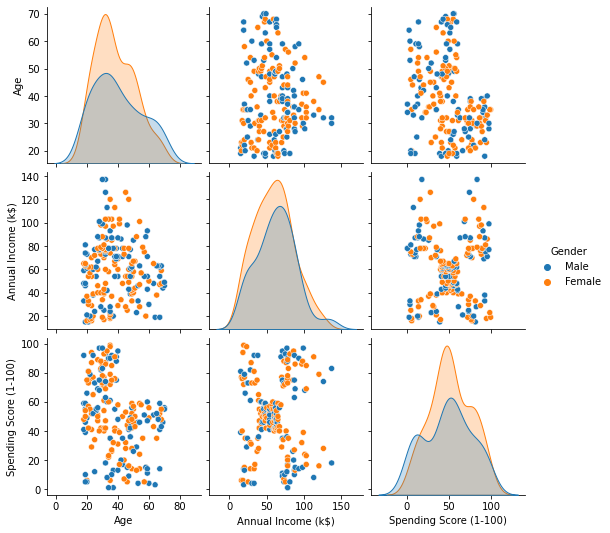

In [238]:
#columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
sns.pairplot(df, hue="Gender");

# 2. KMeans Clustering Models

#### Elbow method conducted to identify the optimal k value. WCSS is the sum of squared distances between the individual points (customers) to the cluster center. The optimal k value will be at a WCSS that begins to be decrease linearly, at the "elbow". 

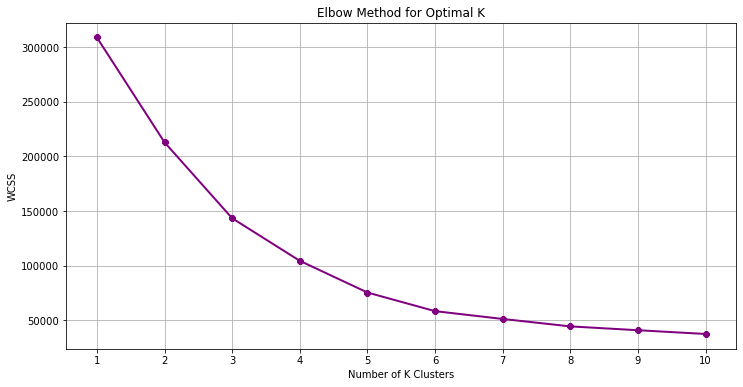

In [7]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="purple", marker ="8")
plt.xlabel("Number of K Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('Elbow Method for Optimal K')
plt.show()

## 2a. Kmeans Model #1: Kmeans with 5 clusters

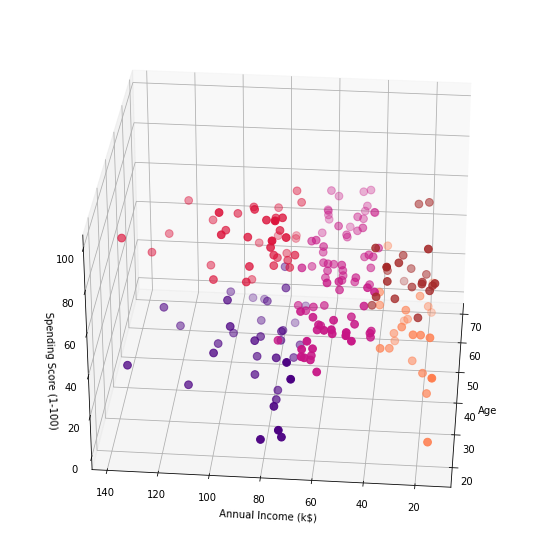

In [8]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters
centroids_df = pd.DataFrame()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='brown', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='crimson', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='coral', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='indigo', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='mediumvioletred', s=60)
ax.view_init(30, 185)
#ax.scatter(centroids_df['X'],centroids_df['Y'], centroids_df['Z'], s=90, marker=",", color="r")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [12]:
#create dataframe with 5 labels from kmeans
kmeans_df = df 

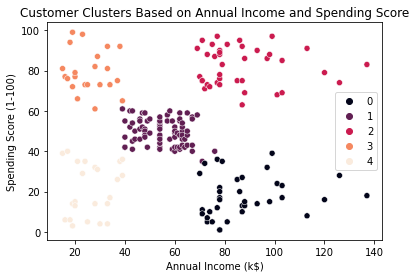

In [290]:
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=clusters, palette = "rocket")
#plt.scatter(x=centroids_[:,0], y=centroids_km[:,1], s=300, c='red', alpha=0.5)
plt.title("Customer Clusters Based on Annual Income and Spending Score")
plt.legend()
plt.show()

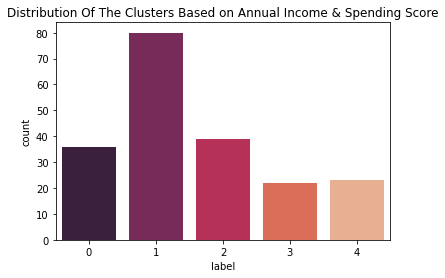

In [261]:
sns.countplot(x=df["label"], palette= "rocket")
plt.title("Distribution Of The Clusters Based on Annual Income & Spending Score")
plt.show()

## 2b. Kmeans Model #2: KMeans with 4 clusters

In [242]:
X = df.iloc[:,2:4].values
km4 = KMeans(n_clusters=4, n_init=10, random_state=0)
clusters_km4 = km4.fit_predict(X)
labels_km4 = km4.labels_

In [243]:
centroids_km4 = kmeans.cluster_centers_

In [244]:
df['clusters'] = clusters_km4

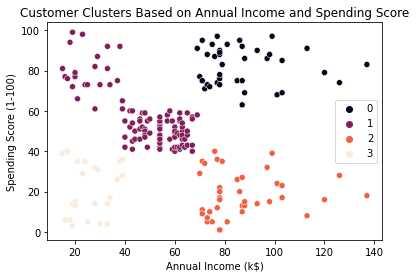

In [264]:
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['clusters'], palette = "rocket")
#plt.scatter(x=centroids_km4[:,0], y=centroids_km4[:,1], s=300, c='red', alpha=0.5)
plt.title("Customer Clusters Based on Annual Income and Spending Score")
plt.legend()
plt.show()

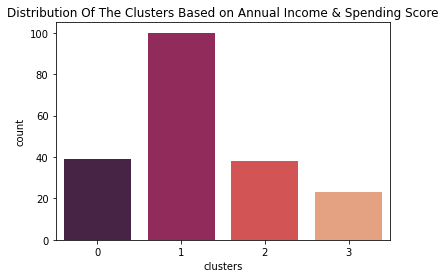

In [120]:
sns.countplot(x=df["clusters"], palette= "rocket")
plt.title("Distribution Of The Clusters Based on Annual Income & Spending Score")
plt.show()

# 3. K-Nearest Neighbors Models

### Data Import to keep seperate from previous model. 

In [34]:
data = pd.read_csv("data/Mall_Customers.csv")
data.drop(["CustomerID"], axis=1, inplace=True)

### Mapping Gender to numeric values for model.

In [35]:
#map gender 1 for female and 0 for male
gender_map = {'Female': 1, 'Male': 0}
data.Gender.replace(gender_map, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## 3a. KNN Models to predict Gender
### Plot of Features and Labels for Exploratory Analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


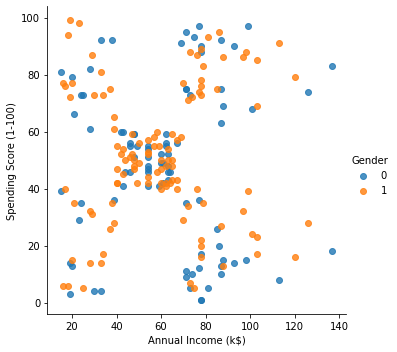

In [36]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=data, fit_reg=False);

### Feature scaling/standardization because data is in different units. 

In [37]:
# Standardize the data to all be the same unit

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Gender', axis=1))

# Transforming the data
scaled_features = scaler.transform(data.drop('Gender', axis=1))
scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [38]:
features = pd.DataFrame(scaled_features, columns=data.columns[1:4])
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [39]:
#train test split
from sklearn.model_selection import train_test_split, GridSearchCV

X = features
y = data.Gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3a-1. KNN Model #1: KNN to predict gender with 5 Neighbors

In [40]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #k=5
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [41]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[ 7 18]
 [10 25]]
              precision    recall  f1-score   support

           0       0.41      0.28      0.33        25
           1       0.58      0.71      0.64        35

    accuracy                           0.53        60
   macro avg       0.50      0.50      0.49        60
weighted avg       0.51      0.53      0.51        60

Accuracy Score: 0.5333333333333333


## 3a-2. KNN Model #2: KNN to predict gender with 3 Neighbors

In [278]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3) # k=3
knn3.fit(X_train, y_train)
pred3 = knn3.predict(X_test)
pred3

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [279]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred3))
print (classification_report(y_test, pred3))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred3)))

[[ 9 16]
 [14 21]]
              precision    recall  f1-score   support

           0       0.39      0.36      0.37        25
           1       0.57      0.60      0.58        35

    accuracy                           0.50        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.49      0.50      0.50        60

Accuracy Score: 0.5


## 3b. KNN Models to Predict Spending Score

### Plot of Features and Labels for Exploratory Analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


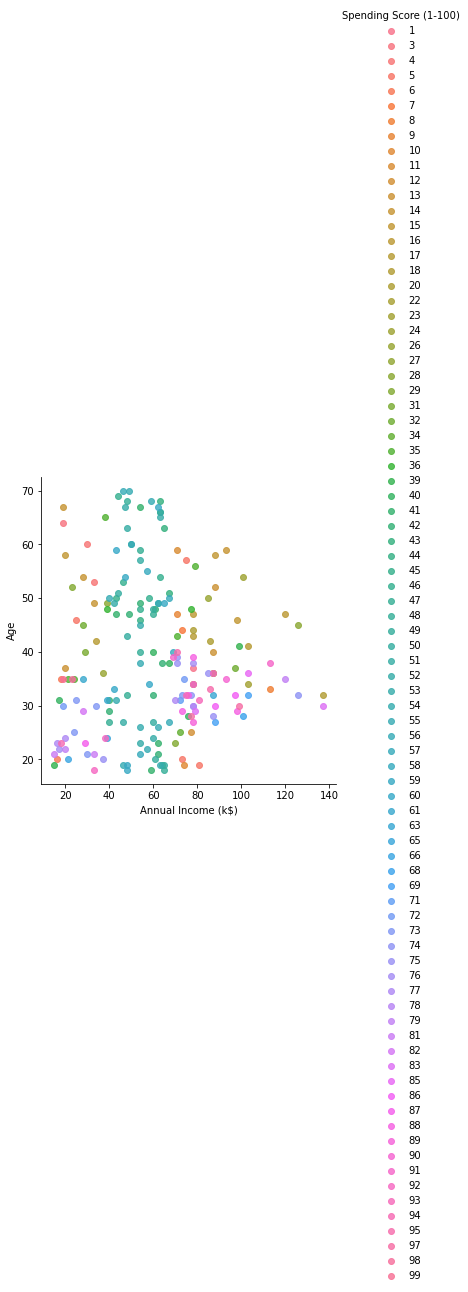

In [246]:
sns.lmplot('Annual Income (k$)', 'Age', hue='Spending Score (1-100)', data=data, fit_reg=False);

In [252]:
# Standardize the data to all be the same unit

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Spending Score (1-100)', axis=1))

# Transforming the data
scaled_features = scaler.transform(data.drop('Spending Score (1-100)', axis=1))
scaled_features

array([[-1.12815215, -1.42456879, -1.73899919],
       [-1.12815215, -1.28103541, -1.73899919],
       [ 0.88640526, -1.3528021 , -1.70082976],
       [ 0.88640526, -1.13750203, -1.70082976],
       [ 0.88640526, -0.56336851, -1.66266033],
       [ 0.88640526, -1.20926872, -1.66266033],
       [ 0.88640526, -0.27630176, -1.62449091],
       [ 0.88640526, -1.13750203, -1.62449091],
       [-1.12815215,  1.80493225, -1.58632148],
       [ 0.88640526, -0.6351352 , -1.58632148],
       [-1.12815215,  2.02023231, -1.58632148],
       [ 0.88640526, -0.27630176, -1.58632148],
       [ 0.88640526,  1.37433211, -1.54815205],
       [ 0.88640526, -1.06573534, -1.54815205],
       [-1.12815215, -0.13276838, -1.54815205],
       [-1.12815215, -1.20926872, -1.54815205],
       [ 0.88640526, -0.27630176, -1.50998262],
       [-1.12815215, -1.3528021 , -1.50998262],
       [-1.12815215,  0.94373197, -1.43364376],
       [ 0.88640526, -0.27630176, -1.43364376],
       [-1.12815215, -0.27630176, -1.395

In [254]:
ss_features = pd.DataFrame(scaled_features, columns=data.columns[0:3])
ss_features.head()

,Gender,Age,Annual Income (k$)
0,-1.128152,-1.424569,-1.738999
1,-1.128152,-1.281035,-1.738999
2,0.886405,-1.352802,-1.700830
3,0.886405,-1.137502,-1.700830
4,0.886405,-0.563369,-1.662660


In [255]:
#train test split
from sklearn.model_selection import train_test_split, GridSearchCV

X = features
y = data['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3b-1. KNN Model #3: Predict Spending Score with 5 Neighbors

In [256]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k=5
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([73, 43, 66, 42, 42, 47, 42, 46, 83, 29, 20, 35, 15, 42, 83, 87, 73,
        4, 20, 66, 17, 75, 83, 51, 49, 42, 28, 75, 85,  6, 14, 73, 52,  4,
       73, 14, 73, 15,  1, 15, 26, 15,  5, 35, 46, 14, 49, 47, 31, 77, 77,
       47, 52, 20, 73, 78, 13,  8, 76, 51])

In [257]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

## 3b-2. KNN Model #4: Predict Spending Score with 4 Neighbors

In [190]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

knn4 = KNeighborsClassifier(n_neighbors=4) 
knn4.fit(X_train, y_train)
pred4 = knn4.predict(X_test)
pred4

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [193]:
# Evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred4))
print (classification_report(y_test, pred4))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred4)))

[[15 10]
 [24 11]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.47        25
           1       0.52      0.31      0.39        35

    accuracy                           0.43        60
   macro avg       0.45      0.46      0.43        60
weighted avg       0.47      0.43      0.42        60

Accuracy Score: 0.43333333333333335


## 3c. Plotting KNN 

In [222]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k):
    x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
    y = data['Gender'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=' + str(k))
    plt.show()

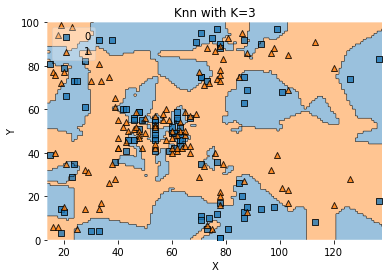

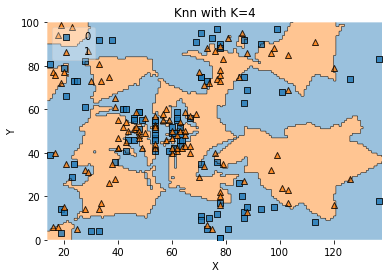

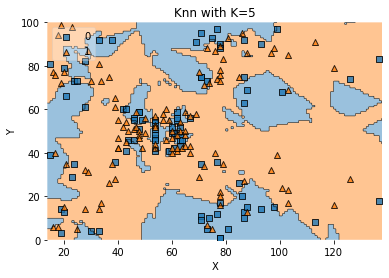

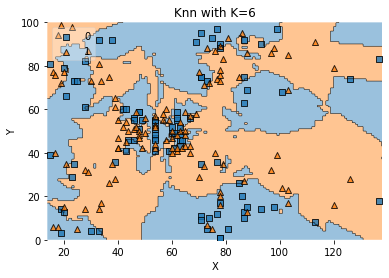

In [223]:
for i in [3,4,5,6]:
    knn_comparison(data, i)

## 3d. Cross Validation with Log Reg

In [42]:
#packages
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

#split data in 10 chunks
kfold=KFold(n_splits=10,random_state=7,shuffle=True) 

LR=LogisticRegression(solver='liblinear')

#pass model and data to apply crossvalidation and labels
results=cross_val_score(LR,X_train,y_train,cv=kfold) 

print("Accuracy: %.3f%% (%.3f%%)"%(results.mean()*100.0,results.std()*100.0))

Accuracy: 57.857% (12.143%)


## 4. Random Forest Model

In [173]:
# Training the algorithm
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [174]:
# Evaluating the algorithm

print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[ 8 17]
 [12 23]]
              precision    recall  f1-score   support

           0       0.40      0.32      0.36        25
           1       0.57      0.66      0.61        35

    accuracy                           0.52        60
   macro avg       0.49      0.49      0.48        60
weighted avg       0.50      0.52      0.51        60

Accuracy Score: 0.5166666666666667


## 5. GridSearchCV
- identifies the "best paramaters" 
- resource: https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 4, 5, 6], #neighbors to test
         'knn__weights': ['uniform', 'distance'], 
         'knn__leaf_size': [15, 20]}] #increases number of searches

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5) #crossval,  number of cv folds for each combination of params

gs_knn.fit(X_train, y_train)
#gs_knn.best_params_ #best parameters
gs_knn.best_estimator_ #best model 

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=15, weights='distance'))])

In [281]:
gs_knn.score(X_train, y_train)

1.0

## 6. KNN to predict clusters identified by Kmeans
- this model is wayyyyy better! 

In [13]:
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,2


In [16]:
#gender mapping
gender_map = {'Female': 1, 'Male': 0}
kmeans_df.Gender.replace(gender_map, inplace=True)
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,0,19,15,39,2
1,0,21,15,81,0
2,1,20,16,6,2
3,1,23,16,77,0
4,1,31,17,40,2


In [17]:
#feature scaling to Standardize the data to all be the same unit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(kmeans_df.drop('label', axis=1))

#transforming the data
scaled_features = scaler.transform(kmeans_df.drop('label', axis=1))
scaled_features

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [20]:
#create df for features
features = pd.DataFrame(scaled_features, columns=kmeans_df.columns[0:4])
features.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [21]:
#train test split
from sklearn.model_selection import train_test_split, GridSearchCV

X = features
y = kmeans_df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
#training and predictions
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([0, 4, 0, 4, 4, 4, 4, 4, 1, 4, 3, 4, 3, 4, 1, 1, 0, 2, 3, 0, 3, 1,
       1, 4, 4, 4, 4, 1, 1, 2, 2, 1, 4, 2, 0, 2, 1, 3, 3, 3, 2, 3, 3, 4,
       4, 2, 4, 4, 4, 0, 0, 4, 4, 3, 0, 1, 2, 3, 0, 4], dtype=int32)

In [23]:
#evaluating the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[ 9  0  0  0  1]
 [ 0 10  0  0  0]
 [ 0  0  8  0  2]
 [ 0  0  0 11  0]
 [ 0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        11
           4       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.97      0.94      0.95        60
weighted avg       0.96      0.95      0.95        60

Accuracy Score: 0.95


# GridSearch CV
- this resulted in the same overall accuracy score but there are improvements in the recall scores

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 4, 5, 6], #neighbors to test
         'knn__weights': ['uniform', 'distance'], 
         'knn__leaf_size': [15, 20]}] #increases number of searches

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5) #crossval,  number of cv folds for each combination of params

gs_knn.fit(X_train, y_train)
#gs_knn.best_params_ #best parameters
gs_knn.best_estimator_ #best model 

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=4))])

In [29]:
#feature scaling to Standardize the data to all be the same unit
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(kmeans_df.drop('label', axis=1))

#transforming the data
scaled_features = scaler.transform(kmeans_df.drop('label', axis=1))
scaled_features

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

In [30]:
#create df for features
features = pd.DataFrame(scaled_features, columns=kmeans_df.columns[0:4])
features.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [31]:
#train test split
from sklearn.model_selection import train_test_split, GridSearchCV

X = features
y = kmeans_df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
#training and predictions
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size=15,n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([0, 4, 0, 4, 4, 4, 4, 4, 1, 3, 3, 4, 3, 4, 1, 1, 0, 2, 3, 0, 3, 1,
       1, 4, 4, 4, 4, 1, 1, 2, 2, 1, 4, 2, 0, 2, 1, 3, 3, 3, 2, 3, 3, 4,
       4, 2, 4, 4, 2, 0, 0, 4, 4, 3, 0, 1, 2, 3, 0, 4], dtype=int32)

In [33]:
#evaluating the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

[[ 9  0  0  0  1]
 [ 0 10  0  0  0]
 [ 0  0  9  0  1]
 [ 0  0  0 11  0]
 [ 0  0  0  1 18]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.92      1.00      0.96        11
           4       0.90      0.95      0.92        19

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy Score: 0.95
